In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
wally = cv2.imread('wally.jpg', 0)
w, h = wally.shape[::-1]

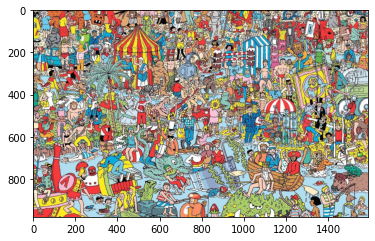

In [3]:
plt.imshow(img)

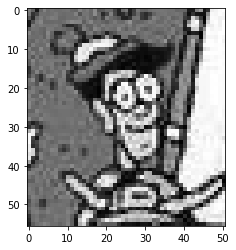

In [4]:
plt.imshow(wally, cmap='gray')

In [5]:
res = cv2.matchTemplate(gray_img, wally, cv2.TM_CCOEFF_NORMED)
if res is not None:
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)

  result = cv2.cvtColor(gray_img.copy(), cv2.COLOR_GRAY2RGB)
  result = cv2.add(result, np.array([-100.0]))
  result[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]] = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

  print('Found Wally')
  plt.imsave('Result.jpg', result)

else:
  print('Cannot Find Wally :(')

Found Wally


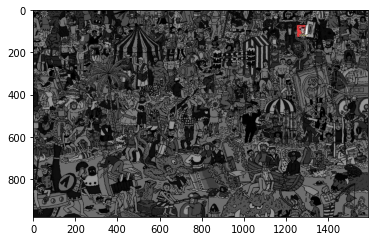

In [6]:
plt.imshow(result)